In [ ]:
import Datos.Data_acq as data
from models_definitions import encoder
from models_definitions import decoder
from models_definitions import cvae
import matplotlib.pyplot as plt

2025-08-06 17:27:17.171440: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-06 17:27:17.299312: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-06 17:27:17.382288: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754512037.464948  293384 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754512037.490229  293384 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754512037.692493  293384 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Datos


In [3]:
import importlib

importlib.reload(data)
x_train, x_test, x_val, y_train, y_test, y_val, x_train_1, y_train_1 = (
    data.get_mnist_data()
)

Usando mnist como dataset


Enconder decoder


E0000 00:00:1754512047.219078  293384 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1754512047.220840  293384 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


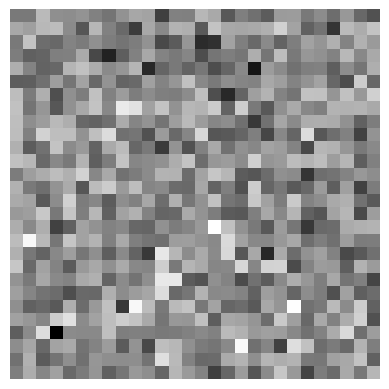

In [ ]:
import numpy as np

importlib.reload(encoder)
importlib.reload(decoder)

en = encoder.build_enconder(intermediate_dim=256, latent_dim=128)
de = decoder.build_decoder(intermediate_dim=256, latent_dim=128)


img_sample = np.expand_dims(x_train[0], axis=0)  # shape (1, 28, 28)
cond_sample = np.expand_dims(y_train[0], axis=0)
[z, z_mean, z_log_var] = en.predict([img_sample, cond_sample])

img_recons = de.predict([z, cond_sample])

plt.imshow(img_recons[0].reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
import tensorflow as tf
from keras.callbacks import EarlyStopping

importlib.reload(cvae)
original_dim = 28 * 28
beta = 1.0

train_dataset = tf.data.Dataset.from_tensor_slices(((x_train, y_train), x_train))
# train_dataset = train_dataset.shuffle(buffer_size=1024).batch(128)
train_dataset = train_dataset.batch(128)

early_stopping = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored quantity
)

val_dataset = tf.data.Dataset.from_tensor_slices(((x_val, y_val), x_val))
val_dataset = val_dataset.batch(128)


cvae = cvae.CVAE(encoder=en, decoder=de, original_dim=original_dim, beta=1)
cvae.compile(optimizer=tf.keras.optimizers.Adam())

2025-08-06 17:27:30.086791: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.
2025-08-06 17:27:30.919390: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


In [6]:
cvae.fit(
    train_dataset,
    epochs=10,
    batch_size=128,
    validation_data=val_dataset,
    callbacks=[early_stopping],
)

Epoch 1/10


2025-08-05 16:55:37.825039: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.
2025-08-05 16:55:37.920258: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - kl_loss: 5.1939 - loss: 46.9405 - reconstruction_loss: 41.7543 - val_kl_loss: 6.1934 - val_loss: 35.4411 - val_reconstruction_loss: 29.3327
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - kl_loss: 5.5829 - loss: 32.7242 - reconstruction_loss: 27.1428 - val_kl_loss: 5.0933 - val_loss: 30.6472 - val_reconstruction_loss: 25.6126
Epoch 3/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - kl_loss: 4.9128 - loss: 28.9428 - reconstruction_loss: 24.0310 - val_kl_loss: 4.8389 - val_loss: 27.7565 - val_reconstruction_loss: 22.9664
Epoch 4/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - kl_loss: 4.7233 - loss: 26.7198 - reconstruction_loss: 21.9970 - val_kl_loss: 4.6245 - val_loss: 26.1168 - val_reconstruction_loss: 21.5694
Epoch 5/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - kl_loss: 4.6101 - loss: 25.5992 - reconstruction_loss: 20.9886 - val_kl_loss: 4.6676 - val_loss: 25.3292 - val_reconstruction_loss: 20.7203
Epoch 6/10
430/430 ━━━━━━━━━━━━━━━━━

In [ ]:
x_input = x_train[:1]  # 1 imagen (shape: (1, 28, 28))
cond_input = y_train[:1]  # su condición (shape: (1, 10))

plt.imshow(x_input[0].reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()

z_mean, z_log_var, z = cvae.encoder.predict([x_input, cond_input])


# Paso por el decoder para reconstrucción
reconstructed = cvae.decoder.predict([z, cond_input])
print(reconstructed.shape)
plt.imshow(reconstructed[0].reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 1

In [ ]:
"""
# Tomá una imagen del conjunto de test
indices_de_testeo=[1, 3, 5, 7, 2, 0, 13, 15, 17, 4] # inidices donde para que x_train[inidicies] sea 0 1 2 3 4 5 6 7 8 9 0

for i in indices_de_testeo:

    imagen = x_train[i]
    #plt.imshow(imagen)
    #plt.show()
    # Visualizá cómo se reconstruye con todas las condiciones posibles
    vis.condiciones(cvae, imagen)
# Ver 10 variantes generadas para la clase 3
for i in range(10):

    vis.variantes(cvae, condicion_id=i, num_variantes=10)
"""

'\n# Tomá una imagen del conjunto de test\nindices_de_testeo=[1, 3, 5, 7, 2, 0, 13, 15, 17, 4] # inidices donde para que x_train[inidicies] sea 0 1 2 3 4 5 6 7 8 9 0\n\nfor i in indices_de_testeo:\n\n    imagen = x_train[i]\n    #plt.imshow(imagen)\n    #plt.show()\n    # Visualizá cómo se reconstruye con todas las condiciones posibles\n    vis.condiciones(cvae, imagen)\n# Ver 10 variantes generadas para la clase 3\nfor i in range(10):\n\n    vis.variantes(cvae, condicion_id=i, num_variantes=10)\n'

# Predictores


In [ ]:
import models_definitions.predictor as predictores

importlib.reload(predictores)

predictor = predictores.build_predictor()

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

predictor.compile(optimizer, loss="categorical_crossentropy")

# x_rain_conv = np.reshape(x_train,(28,28,1))
predictor.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=5,
    validation_data=(x_val, y_val),  # Include validation data
    #    callbacks=[cp_callback_predictor_C2, early_stopping]  # Add early_stopping to callbacks
)

Model: "predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ original_input (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_layer (ReshapeLayer)    │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,570 (197.54 KB)

 Trainable params: 50,378 (196.79 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/5


2025-08-05 16:56:30.031581: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


430/430 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - loss: 0.5876 - val_loss: 0.6373
Epoch 2/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - loss: 0.3935 - val_loss: 0.2883
Epoch 3/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - loss: 0.3426 - val_loss: 0.2794
Epoch 4/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - loss: 0.3079 - val_loss: 0.2717
Epoch 5/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - loss: 0.2904 - val_loss: 0.2673


(784,)


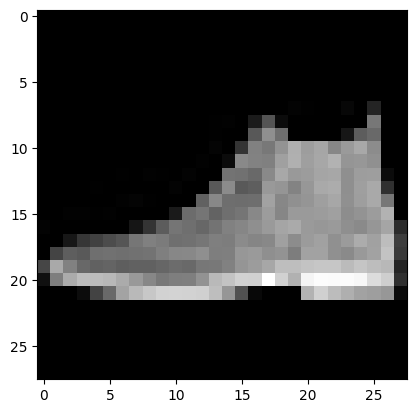

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Digito predicho: 9


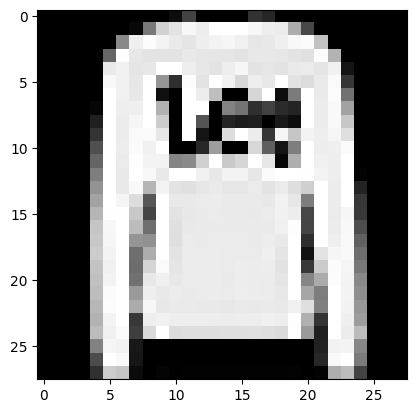

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Digito predicho: 2


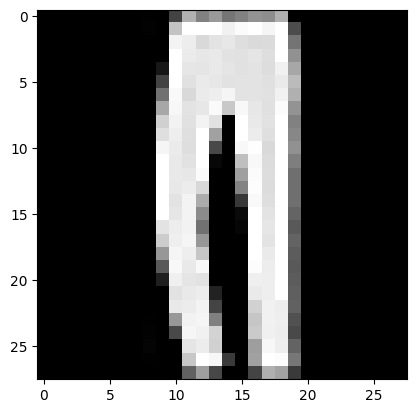

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Digito predicho: 1


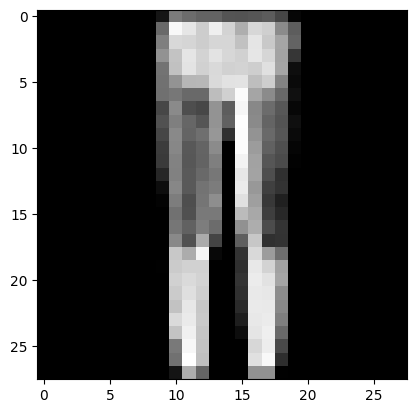

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Digito predicho: 1


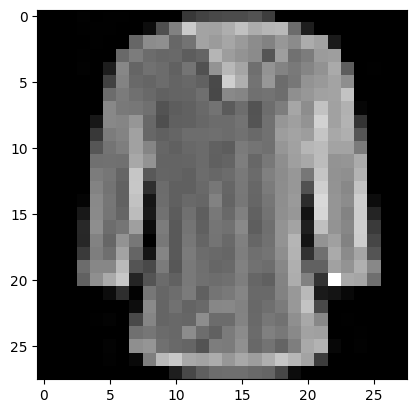

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Digito predicho: 6


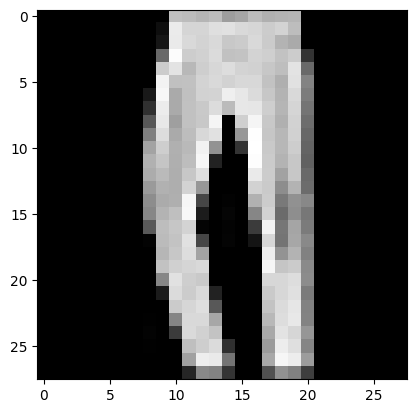

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digito predicho: 1


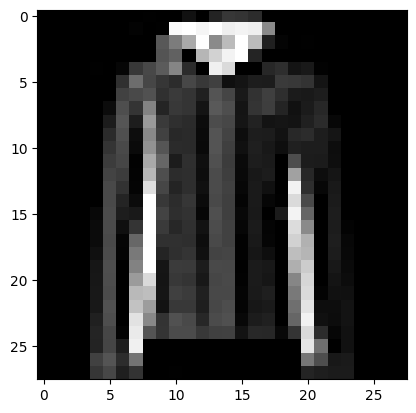

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Digito predicho: 4


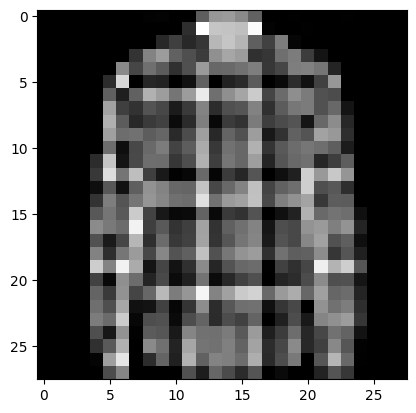

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Digito predicho: 6


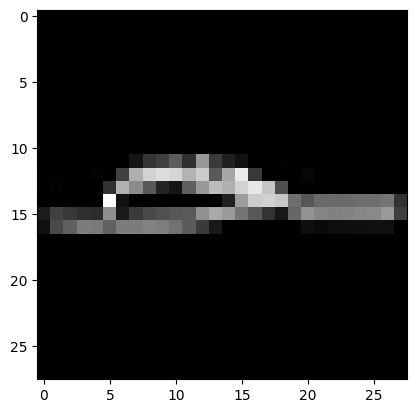

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Digito predicho: 5


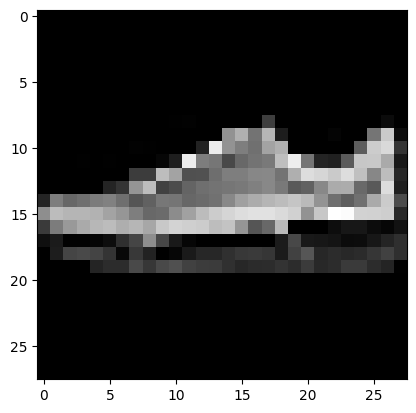

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Digito predicho: 7


In [ ]:
print(x_test[0].shape)
for i in range(10):
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.show()
    print("dentro del loop")
    print(x_test[i].shape)
    print(
        f"Digito predicho: {np.argmax( predictor.predict(x_test[i].reshape(1, 784)))}"
    )

# Pruebas de separacion de digitos


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
tf.Tensor(
[17.387882  18.320414  19.129152   6.592601  18.786463  14.515902
 15.516781  19.35508    5.8715887  8.226571 ], shape=(10,), dtype=float32)
tf.Tensor(
[14.025203  12.723304  19.040333   7.763888  14.713549  16.14956
 13.210166   9.919034   6.3535943  8.501949 ], shape=(10,), dtype=float32)
tf.Tensor(
[15.706543  15.521858  19.084743   7.1782446 16.750006  15.332731
 14.363474  14.637056   6.1125917  8.36426  ], shape=(10,), dtype=float32)
tf.Tensor(
[ 8.0222     5.802441  11.493522  11.7733     9.498556   6.3528085
 16.116922   6.133609  15.025571  14.509909 ], shape=(10,), dtype=float32)
tf.Tensor(
[ 7.12016    4.88922   13.418408  15.609543   7.9039593  5.7958026
 12.443234

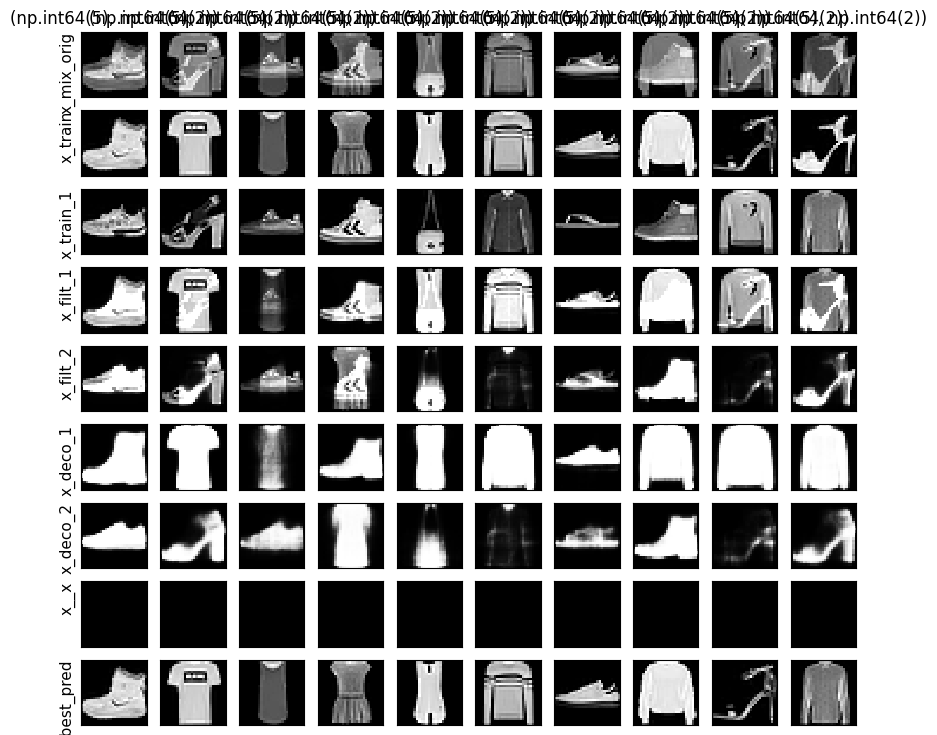

((<tf.Tensor: shape=(), dtype=float32, numpy=15.442843437194824>,
  <tf.Tensor: shape=(), dtype=float32, numpy=1.5060714483261108>),
 array([[1.25442818e-06, 2.97313729e-08, 1.54986765e-06, 7.75359183e-07,
         2.59179615e-05, 7.08596548e-04, 8.89706462e-06, 5.82768908e-03,
         2.00745184e-04, 9.93224502e-01],
        [9.79427576e-01, 1.86166999e-05, 1.38715310e-02, 5.38068265e-03,
         5.30267835e-06, 4.61396716e-08, 5.48516691e-04, 2.21780397e-06,
         7.45127618e-04, 4.51894834e-07],
        [2.01223746e-01, 1.61693676e-03, 3.06110531e-01, 4.44090843e-01,
         7.47378776e-03, 6.16883975e-04, 1.68129057e-02, 1.86129548e-02,
         2.43339033e-04, 3.19804554e-03],
        [1.92701569e-04, 1.25733322e-05, 2.21045036e-03, 1.65666570e-05,
         1.81955664e-04, 1.95267573e-02, 5.18486323e-03, 9.78387967e-02,
         5.93474647e-03, 8.68900537e-01],
        [2.49834284e-01, 2.83678830e-01, 9.86959552e-04, 4.05777186e-01,
         1.36899268e-02, 5.92709921e-06, 4

In [ ]:
import inferencias.inferencia as inf
import importlib

importlib.reload(inf)

n_pictures = 10

inf.unmix(
    x_train[0:n_pictures],
    x_train_1[0:n_pictures],
    y_train[0:n_pictures],
    y_train_1[0:n_pictures],
    cvae,
    predictor,
    num_col=n_pictures,
    show_graph=True,
    Iterations=5,
)